In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
# import viz # curriculum viz example code

np.random.seed(123)

0.40600584970983794

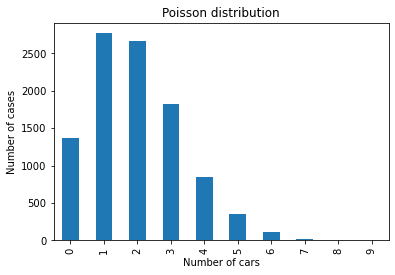

In [99]:

#  A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a 
# Poisson distribution with a mean of 2 cars. Make a chart of this distribution and 
# answer these questions concerning the probability of cars waiting at the drive-up window.
stats.poisson(2)

#or

pd.Series(stats.poisson(2).rvs(10_000)).value_counts().sort_index().plot.bar()

plt.title('Poisson distribution')
plt.xlabel('Number of cars')
plt.ylabel('Number of cases')

# What is the probability that no cars drive up in the noon hour? -- 0.1353
(pd.Series(stats.poisson(2).rvs(10_000)) == 0).mean()

stats.poisson(2).pmf(0)

# # What is the probability that 3 or more cars come through the drive through? --0.3233
(pd.Series(stats.poisson(2).rvs(10_000)) >= 3).mean()

stats.poisson(2).sf(2)
# # How likely is it that the drive through gets at least 1 car?-- 0.4060
(pd.Series(stats.poisson(2).rvs(10_000)) < 2).mean()

stats.poisson(2).cdf(1)

In [178]:
# arr = stats.norm(3, 0.3).rvs(10_000) > 3.49
# arr_sorted = sorted(arr)
# arr_sorted

# score = pd.Series(stats.norm(3, 0.3).rvs(10_000))
# percentile = score.apply(lambda x: stats.percentileofscore(arr_sorted, x))
# percentile.sort_value()
# df = pd.DataFrame({'data': score, 'percentile': percentile})
# sorted_value = df.sort_values(by = 'data')
# sorted_value.where(sorted_value.percentile >= 95, [True, False])
# series =  np.random.normal(3,0.3, size=(10_000))
# stats.percentileofscore(arr_sorted, series)

0.0509

In [189]:

#  Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
# What grade point average is required to be in the top 5% of the graduating class? 3.49 or above

stats.norm(3, 0.3).isf(.05)

((np.random.normal(3, 0.3, size = 10000)) >= 3.49).mean() # --0.0516


# # What GPA constitutes the bottom 15% of the class? --2.69

stats.norm(3, 0.3).ppf(.15)

((np.random.normal(3, 0.3, size = 10000)) < 2.69).mean() # --0.154

# # An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# # Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

# -- 3rd decile starts below 2.84, so 2.8 GPA would qualify
stats.norm(3, 0.3).ppf(.3, .2)

(np.random.normal(3, 0.3, size = 10000) < 2.84).mean() # -- 0.293


0.955

In [ ]:

# # If I have a GPA of 3.5, what percentile am I in? -- 95.22 percentile
stats.norm(3, 0.3).cdf(3.5)

(np.random.normal(3, 0.3, 10_000) < 3.5).mean() # -- 0.955


In [190]:

# A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through? --0.1398
click_rate =  0.02
n_trial = 4326
# probability of 97 or more clicks is same as the probability of clicks more than 96.
stats.binom(n_trial, click_rate).sf(96)


0.13975823631416445

In [198]:

#simulation
#0 = not opened, 1 = opened
sim = np.random.choice(['not clicked','clicked'], size = (10_000, 4326), p = [0.98, 0.02])
sim



array([['not opened', 'not opened', 'not opened', ..., 'not opened',
        'not opened', 'not opened'],
       ['not opened', 'not opened', 'not opened', ..., 'not opened',
        'not opened', 'not opened'],
       ['not opened', 'not opened', 'not opened', ..., 'not opened',
        'not opened', 'not opened'],
       ...,
       ['not opened', 'not opened', 'not opened', ..., 'not opened',
        'not opened', 'not opened'],
       ['not opened', 'not opened', 'not opened', ..., 'not opened',
        'not opened', 'not opened'],
       ['not opened', 'not opened', 'not opened', ..., 'not opened',
        'not opened', 'not opened']], dtype='<U10')

In [200]:
((sim == 'clicked').sum(axis=1) >= 97).mean()


0.1356

In [41]:

# You are working on some statistics homework consisting of 100 questions 
# where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.

# What is the probability that at least one of your first 60 answers is correct? -- 0.4576
probabilities = 1/100
stats.binom(60, probabilities).sf(0)

#simulation
# 0 = not correct, 1 = correct
((np.random.choice([0,1], size = (10_000, 60), p =(0.99, 0.01))).sum(axis =1)>0).mean()


0.4576

In [221]:

# The codeup staff tends to get upset when the student break area is not cleaned up.
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it,
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day?  -- 0.8362
# How likely is it that it goes two days without getting cleaned up? 
# All week?
n_trial = round(.9*3*22)
stats.binom(n_trial, 0.03).sf(0)

(np.random.choice([0,1], size=(10_000, n_trial), p = (0.97, 0.03)) > 0).any(axis=1).mean()

#2 days without cleaning -- 0.0275
stats.binom(n_trial * 2, 0.03).pmf(0)

(np.random.choice([0,1], size=(10_000, n_trial *2), p = (0.97, 0.03)) == 0).all(axis=1).mean()

#5days without cleaning -- 0.000125
stats.binom(n_trial * 5, 0.03).pmf(0)

(np.random.choice([0,1], size=(10_000, n_trial*5), p = (0.97, 0.03)) == 0).all(axis=1).mean() # -- 0.0004


0.0004

In [70]:

# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime.
# After several weeks of careful observation, you notice that the average number of people
# in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

# Change the person into minutes (2 minutes per person to order)
# 30 minutes average waiting with std of 6 minutes
# likelihood of having 15 left is equivalent to the likelihood of order coming out under 45 minutes, given lunch is an hour.
# 45 minutes is subracted by 10 minutes to receive food and 2 minutes to order food -- 0.6915
stats.norm(15 * 2, 3 * 2).cdf(33)

#simulation -- 0.6837
(np.random.normal(30, 6, size = (10_000)) <= 33).mean()


0.6914624612740131

In [78]:

# Connect to the employees database and find the average salary of current employees, along with the standard deviation.
from env import get_db_url

url = get_db_url('employees')
query = '''
        SELECT *
        FROM salaries s
        WHERE s.to_date > NOW()
        '''
emp_salary = pd.read_sql(query, url)
emp_salary


,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [164]:

emp_salary.describe()

avg_salary = emp_salary.salary.mean()
std_salary = emp_salary.salary.std()
#  For the following questions, calculate the answer based on modeling the employees salaries 
# with a normal distribution defined by the calculated mean and standard deviation
#  then compare this answer to the actual values present in the salaries dataset.


# What percent of employees earn less than 60,000? -- 24.39%
stats.norm(avg_salary,std_salary).cdf(60_000)

(emp_salary.salary < 60000).mean() # -- 27.06%


0.2705727041028802

In [166]:

# What percent of employees earn more than 95,000? -- 9.21%
stats.norm(avg_salary,std_salary).sf(95_000)

(emp_salary.salary > 95000).mean() # -- 10.86%


0.1086272092752078

In [173]:

# What percent of employees earn between 65,000 and 80,000? 
# -- array([0.65729708, 0.32223651])
# 33.51%
stats.norm(avg_salary,std_salary).sf([65_000, 80_000])
0.65729708 - 0.32223651

((emp_salary.salary < 80000) & (emp_salary.salary > 65000)).mean() # -- 32.51%

0.325107028035515

In [174]:

# What do the top 5% of employees make? -- $100,484.64
stats.norm(avg_salary,std_salary).isf(0.05)

# (emp_salary.salary)

# Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", 
# remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql.


100484.64454102777

In [ ]:

# Be sure to run the following 2 commands from your terminal:
#  1. cp ~/codeup-data-science/numpy-pandas-visualization-exercises/.gitignore ~/codeup-data-science/statistics-exercises
#  to ensure that your stats repo has a known-good gitignore 
# 2. cp ~/codeup-data-science/numpy-pandas-exercises/env.py ~/codeup-data-science/statistics-exercises 
# to ensure that pandas will have access to your db credentials.